# Week 5: Building a regression classifier

In this activity, we're going to use decision trees to determine the redshifts of galaxies from their photometric colours. We'll use galaxies where accurate spectroscopic redshifts have been calculated as our gold standard. We will learn how to assess the accuracy of the decision trees predictions and have a look at validation of our model.

We will also have a quick look at how this problem might be approached without using machine learning. This will highlight some of the limitations of the classical approach and demonstrate why a machine learning approach is ideal for this type of problem.

If you want to run your code offline, you can download the full NumPy dataset for this activity here.

This activity is based on the scikit-learn example on Photometric Redshifts of Galaxies.

Write a get_features_targets function that splits the training data into input features and their corresponding targets. In our case, the inputs are the 4 colour indices and our targets are the corresponding redshifts.

Your function should return a tuple of:

features: a NumPy array of dimensions m ⨉ 4, where m is the number of galaxies;
targets: a 1D NumPy array of length m, containing the redshift for each galaxy.
The data argument will be the structured array described on the previous slide. The u flux magnitudes and redshifts can be accessed as a column with data['u'] and data['redshift'].

The four features are the colours u - g, g - r, r - i and i - z. To calculate the first column of features, subtract the u and g columns, like this:


print(data['u'] - data['g'])
import numpy as np
data = np.load('sdss_galaxy_colors.npy')
print(data['u'] - data['g'])
The features for the first 2 galaxies in the example data should be:

[[ 0.31476  0.0571   0.28991  0.07192]
 [ 1.2002   0.82026  0.45294  0.24665]]
And the first 2 targets should be:
[ 0.539301   0.1645703] 


In [2]:
import numpy as np
data = np.load('sdss_galaxy_colors.npy')
print(data[0])

print(data['u'] - data['g'])

(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301, 6.543622e-05)
[0.31476 1.2002  1.65941 ... 1.72629 0.23287 0.19067]


In [5]:
data

array([(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05),
       (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05),
       (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05),
       ...,
       (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 2.159406e-05),
       (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 4.505933e-04),
       (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 6.203324e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In [7]:
data.dtype.names


('u', 'g', 'r', 'i', 'z', 'spec_class', 'redshift', 'redshift_err')

In [11]:
def get_features_targets(data):
    data = np.load('sdss_galaxy_colors.npy')

    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    
    targets =  data['redshift'] 
    
    return features, targets


if __name__ == "__main__":
  # load the data
  data = np.load('sdss_galaxy_colors.npy')
    
  # call our function 
  features, targets = get_features_targets(data)
    
  # print the shape of the returned arrays
  print(features[:2])
  print(targets[:2])


[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]
[0.539301  0.1645703]


We are now going to use our features and targets to train a decision tree and then make a prediction. We are going to use the DecisionTreeRegressor class from the sklearn.tree module.

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# copy in your get_features_targets function here
def get_features_targets(data):
    data = np.load('sdss_galaxy_colors.npy')

    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    targets =  data['redshift'] 
    
    return features, targets

# load the data and generate the features and targets
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)
  
# initialize model
dtr = DecisionTreeRegressor()

# train the model
dtr.fit(features, targets)

# make predictions using the same features
predictions = dtr.predict(features)

# print out the first 4 predicted redshifts
print(predictions[:4])


[0.539301   0.1645703  0.04190006 0.04427702]


So we trained a decision tree! Great...but how do we know if the tree is actually any good at predicting redshifts?

In regression we compare the predictions generated by our model with the actual values to test how well our model is performing. The difference between the predicted values and actual values (sometimes referred to as residuals) can tell us a lot about where our model is performing well and where it is not.

While there are a few different ways to characterise these differences, in this tutorial we will use the median of the differences between our predicted and actual values. 

In this problem we will implement the function median_diff. The function should calculate the median residual error of our model, i.e. the median difference between our predicted and actual redshifts.

The median_diff function takes two arguments – the predicted and actual/target values. When we use this function later in the tutorial, these will corresponding to the predicted redshifts from our decision tree and their corresponding measured/target values.

In [17]:
import numpy as np

# write a function that calculates the median of the differences
# between our predicted and actual values
def median_diff(predicted, actual):
    return np.median(abs(predicted-actual))

We previously used the same data for training and testing our decision trees.

This gives an unrealistic estimate of how accurate the model will be on previously unseen galaxies because the model has been optimised to get the best results on the training data.

The simplest way to solve this problem is to split our data into training and testing subsets:

This method of validation is the most basic approach to validation and is called held-out validation. We will use the med_diff accuracy measure and hold-out validation in the next problem to assess the accuracy of our decision tree.

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
    data = np.load('sdss_galaxy_colors.npy')

    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    targets =  data['redshift'] 
    
    return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
    return np.median(abs(predicted-actual))

# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
  # split the data into training and testing features and predictions
    split = features.shape[0]//2
    train_features = features[:split]
    test_features = features[split:]
    train_targets = targets[:split]
    test_targets = targets[split:]
    
  # train the model
    dtr = DecisionTreeRegressor()
    dtr.fit(train_features, train_targets)
    
  # get the predicted_redshifts
    predictions = dtr.predict(test_features)
    
    # use median_diff function to calculate the accuracy
    return median_diff(test_targets, predictions)


if __name__ == "__main__":
    data = np.load('sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # initialize model
    dtr = DecisionTreeRegressor()

    # validate the model and print the med_diff
    diff = validate_model(dtr, features, targets)
    print('Median difference: {:f}'.format(diff))


Median difference: 0.021892


You can see how the decision is made at each node as well as the number of samples which reach that node. We won't go through how to make these plots in the tutorial, but you can download a demo script and data to try at home.

The median of differences of  
≈
0.02
 . This means that half of our galaxies have a error in the prediction of  
<
0.02
 , which is pretty good. One of the reason we chose the median of differences as our accuracy measure is that it gives a fair representation of the errors especially when the distribution of errors is skewed. The graph below shows the distribution of residuals (differences) for our model along with the median and interquartile values.

In [31]:
pwd

'C:\\Users\\incar\\Documents\\GitHub\\Data-driven-Astronomy\\week5-decision_tree_redshift'

In [30]:
#!pip install update sklearn

In [24]:
import numpy as np
import pydotplus as pydotplus
from sklearn.tree import DecisionTreeRegressor,export_graphviz

if __name__ == "__main__":
    data = np.load('sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # Initialize model
    dtr = DecisionTreeRegressor(max_depth=3)    # We will come to this input in the next tutorial

    # Split the data into training and testing
    split_index = int(0.5 * len(features))
    train_features = features[:split_index]
    train_targets = targets[:split_index]

    dtr.fit(train_features, train_targets)

    dot_data = export_graphviz(dtr, out_file=None,feature_names=['u - g', 'g - r', 'r - i', 'i - z'])
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_jpg("decision_tree.jpg")


InvocationException: GraphViz's executables not found

The number of galaxies we use to train the model has a big impact on how accurate our predictions will be. This is the same with most machine learning methods: the more data that they are trained with, the more accurate their prediction will be.

Here is how our median difference changes with training set size:

Training galaxies	median_diff
50	0.048
500	0.026
5000	0.023
50000	0.022
Understanding how the accuracy of the model changes with sample size is important to understanding the limitations of our model. We are approaching the accuracy limit of the decision tree model (for our redshift problem) with a training sample size of 25,000 galaxies.

The only way we could further improve our model would be to use more features. This might include more colour indices or even the errors associated with the measured flux magnitudes.

![title](pic3.png)


In [28]:
import numpy as np
from matplotlib import pyplot as plt

import numpy as np
from matplotlib import pyplot as plt

# Complete the following to make the plot
if __name__ == "__main__":
    data = np.load('sdss_galaxy_colors_limz.npy')
    # Get a colour map
    cmap = plt.get_cmap('YlOrRd')

    # Define our colour indexes u-g and r-i
    u_g = data['u'] - data['g']
    r_i = data['r'] - data['i']

    # Make a redshift array
    redshift = data['redshift']

    # Create the plot with plt.scatter
    plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

    cb = plt.colorbar(plot)
    cb.set_label('Redshift')

    # Define your axis labels and plot title
    plt.xlabel('Colour index  u-g')
    plt.ylabel('Colour index  r-i')
    plt.title('Redshift (colour) u-g versus r-i')

    # Set any axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1)

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sdss_galaxy_colors_limz.npy'

## Improving and evaluating our classifier

 
Complete the function accuracy_by_treedepth. The function should return the median difference for both the testing and training data sets for each of the tree depths in depths.

accuracy_by_treedepth should take the following arguments:

features and targets (as in previous problems);
depths: an array of tree depths to be used as the max_depth of the decision tree regressor.
Your function should return two lists (or arrays) containing the median_diff values for the predictions made on the training and test sets using the maximum tree depths given by the depths.

For example, if depths is [3, 5, 7], then your function should return two lists of length 3. You can choose the size of the split between your testing and training data (if in doubt, 50:50 is fine).

We've included code to plot the differences as a function of tree depths. You should take a moment to familiarise yourself with what each line is doing. If your code is working well then your plot should look a bit like the following:

Depth with lowest median difference : 21


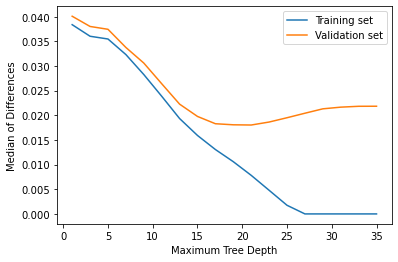

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    targets =  data['redshift']  
    return features, targets
  
# paste your median_diff function here
def median_diff(predicted, actual):
    return np.median(abs(predicted-actual))

# Complete the following function
def accuracy_by_treedepth(features, targets, depths):
  # split the data into testing and training sets
    split = features.shape[0]//2
    train_features = features[:split]
    test_features = features[split:]
    train_targets = targets[:split]
    test_targets = targets[split:]
    
  # initialise arrays or lists to store the accuracies for the below loop
    accuracies_test = []
    accuracies_train = []
  
  # loop through depths
    for depth in depths:
      # initialize model with the maximum depth. 
      dtr = DecisionTreeRegressor(max_depth=depth)

      # train the model using the training set
      dtr.fit(train_features, train_targets)

      # get the predictions for the training set and calculate their median_diff
      predictions = dtr.predict(train_features)
      accuracies_train.append(median_diff(train_targets, predictions))

      # get the predictions for the testing set and calculate their median_diff
      predictions = dtr.predict(test_features)
      accuracies_test.append(median_diff(test_targets, predictions)) 

    # return the accuracies for the training and testing sets
    return accuracies_train, accuracies_test

if __name__ == "__main__":
  data = np.load('sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # Generate several depths to test
  tree_depths = [i for i in range(1, 36, 2)]

  # Call the function
  train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
  print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))
    
  # Plot the results
  train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
  test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
  plt.xlabel("Maximum Tree Depth")
  plt.ylabel("Median of Differences")
  plt.legend()
  plt.show()


We can see that the accuracy of the decision tree on the training set gets better as we allow the tree to grow to greater depths. In fact, at a depth of 27 our errors goes to zero!

Conversly, the accuracy measure of the predictions for the test set gets better initially and then worse at larger tree depths. At a tree depth ~19 the decision tree starts to overfit the data. This means it tries to take into account outliers in the training set and loses its general predictive accuracy.

Overfitting is a common problem with decision trees and can be circumvented by adjusting parameters like the tree depth or setting a minimum number of cases at each node. For now, we will set a maximum tree depth of 19 to prevent over-fitting in our redshift problem.

## K-fold validation

Your task is to complete the function cross_validate_model. The function takes 4 arguments:

model, feaures, and targets as in previous problems;
k in our k-fold. This is the number of subsets to train and test.
Your function should return a list containing the k median of differences for each of the k folds using median_diff.

Note that we have set the max_depth=19 when we initialise the decision tree to prevent the model from overfitting.

KFolds usage
We have created the KFold object to give you a set of training and testing indices for each of the k runs. It is worth taking a moment to understand this.

Specifically, the object is initialised with

kf = KFold(n_splits=k, shuffle=True)
The n_splits=k passes our desired number of subsets/folds. We want to shuffle the data (as previously explained). The iterator is then used with:

for train_indices, test_indices in kf.split(features):
The kf.split(features) is an iterator that, for each of the k iterations, returns two arrays of indices to be used with our feature and target arrays, i.e. features[train_indices],targets[train_indices]

In [10]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# complete this function
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  diffs = []

  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
    
    # predict using the model
    predictions = model.predict(test_features)
 
    # calculate the median_diff from predicted values and append to results array
    diffs.append(median_diff(predictions, test_targets))
 
  # return the list with your median difference values
  return diffs


if __name__ == "__main__":
  data = np.load('./sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model with a maximum depth of 19
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  diffs = cross_validate_model(dtr, features, targets, 10)

  # Print the values
  print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
  print('Mean difference: {:.3f}'.format(np.mean(diffs)))

Differences: 0.018, 0.017, 0.017, 0.017, 0.018, 0.017, 0.017, 0.018, 0.017, 0.018
Mean difference: 0.017
